# Altair area chart examples

By [Ben Welsh](http://palewi.re/who-is-ben-welsh/)

How to use the [Altair](http://altair-viz.github.io) data visualization library to create an array of area charts.

### Preparation

We start by importing Altair.

In [33]:
import altair as alt

Next we bring in our example dataset, which tracks the mix of power sources used to generate electricity in the state of Iowa.

It's provided by the U.S. Energy Information Administration via the [Vega](https://vega.github.io/vega/) project's example datasets library.

In [34]:
import vega_datasets

In [35]:
data = vega_datasets.data.iowa_electricity()

It shows that the share of Iowa's electricity generated via renewable sources like wind power has skyrocketed in recent years.

There are three electricity sources: fossil fuels, nuclear energy and renewables. Each source's net generation numbers are reported in thousand megawatthours by year. The dates are encoded in ISO format.

In [36]:
data.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


That last part is important. Altair generally expects that the x-asix of area charts will be based on be datestamps it can encode as ["temporal"](https://altair-viz.github.io/user_guide/encoding.html#data-types) data. If the data you're working with are integers or something besides datestamps, you'll need to find a workaround. We'll get to that later.

But let's make some charts, huh? To start, here's something simple.

### Stacked area chart

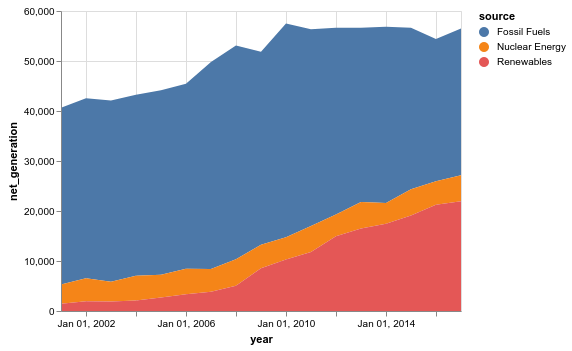

In [37]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

That shows the absolute increase in renewables. But what about as a share? That's where the "normalize" option comes in.

### Normalized stacked area chart

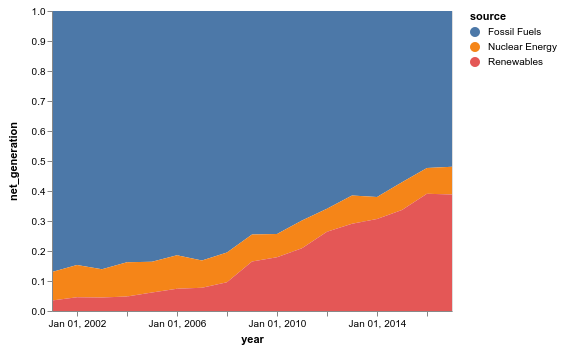

In [38]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack="normalize"),
    color="source:N"
)

Find that a little hard to read? You can layer the areas on top of each other by removing the stack and lower the opacity.

### Layered area chart

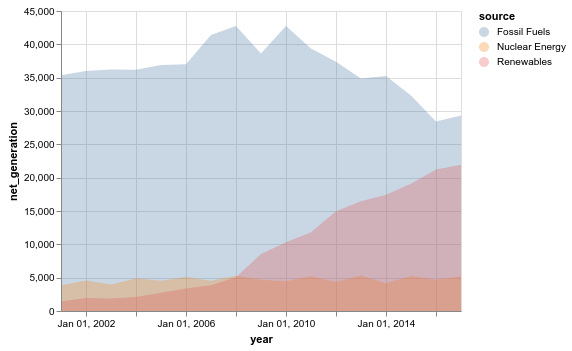

In [39]:
alt.Chart(data).mark_area(opacity=0.3).encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack=None),
    color="source:N"
)

You'd rather have small muliples to compare the charts side by side? Easy. Use the `row` option. 

### Trellis area chart

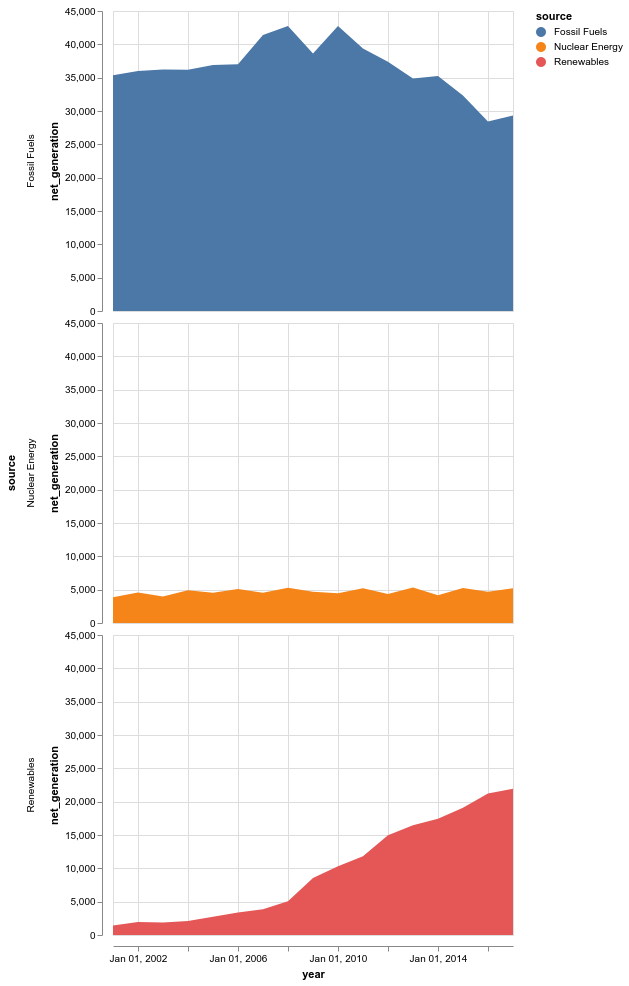

In [40]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N",
    row="source:N"
)

After trying out all those examples, I think the normalized one tells our story in the clearest, most compact way. Here's how to use Altair's other options to clean it up and prepare it for publication.

### Normalized stacked area chart, manicured

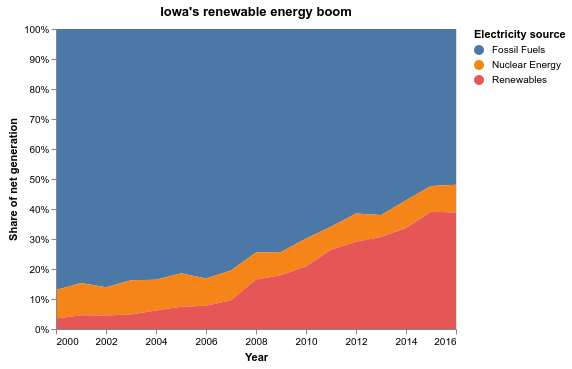

In [41]:
alt.Chart(
    data,
    title="Iowa's renewable energy boom"  # Name it
).mark_area().encode(
    x=alt.X(
        "year:T",
        timeUnit="year",  # Fix the X ticks by setting the time unit to display
        axis=alt.Axis(title="Year")  # Clean up the X label 
    ),
    y=alt.Y(
        "net_generation:Q",
        stack="normalize",
        axis=alt.Axis(title="Share of net generation", format=".0%"),  # Set the Y ticks to %
    ),
    color=alt.Color(
        "source:N",
        legend=alt.Legend(title="Electricity source"),  # Clean up the legend title
    )
)

### What about those other date formats again?

A lot of annual datasets, especially those from the U.S. government, tend to release the data as integers rather than datestamps. What you get typically looks a little more like this.


In [42]:
data.year = data.year.dt.year

In [43]:
data.head()

,year,source,net_generation
0,2001,Fossil Fuels,35361
1,2002,Fossil Fuels,35991
2,2003,Fossil Fuels,36234
3,2004,Fossil Fuels,36205
4,2005,Fossil Fuels,36883


You can still easily make an Altair area chart. One quick way is to encode the x axis as "ordinal" data.

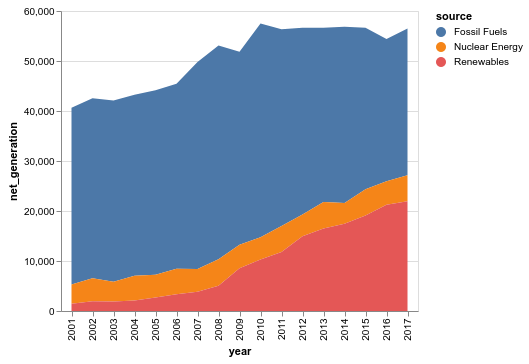

In [44]:
alt.Chart(data).mark_area().encode(
    x="year:O",  # <-- Right there
    y="net_generation:Q",
    color="source:N"
)

You'll notice that the chart doesn't bleed to the edge of the frame, but if you're sketching you might not care.

If you want to convert your ordinal data to datestamps for the chart, it is not hard. Pandas has a tool built in called [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

In [45]:
import pandas as pd

In [50]:
data.year = pd.to_datetime(data.year, format="%Y")

Now you can encode it as temporal data and get the same charts as above.

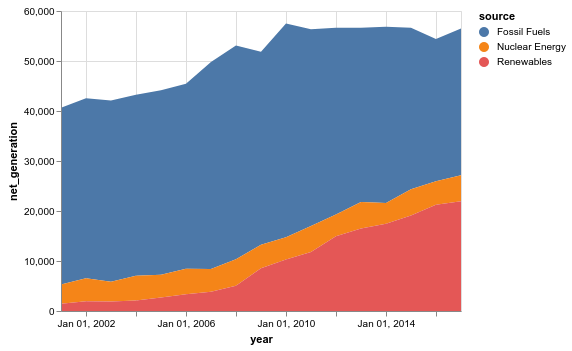

In [52]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)